In [34]:
import os
import tarfile
import urllib

DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_URL + "datasets/housing/housing.tgz"

def fetch_data(url=HOUSING_URL, path=HOUSING_PATH):
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "housing.tgz")
    urllib.request.urlretrieve(url, tgz_path)
    tgz = tarfile.open(tgz_path)
    tgz.extractall(path=path)
    tgz.close()


In [35]:
fetch_data()

In [36]:
import pandas as pd

def load_housing_data(path=HOUSING_PATH):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

housing_data = load_housing_data()

In [37]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [39]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


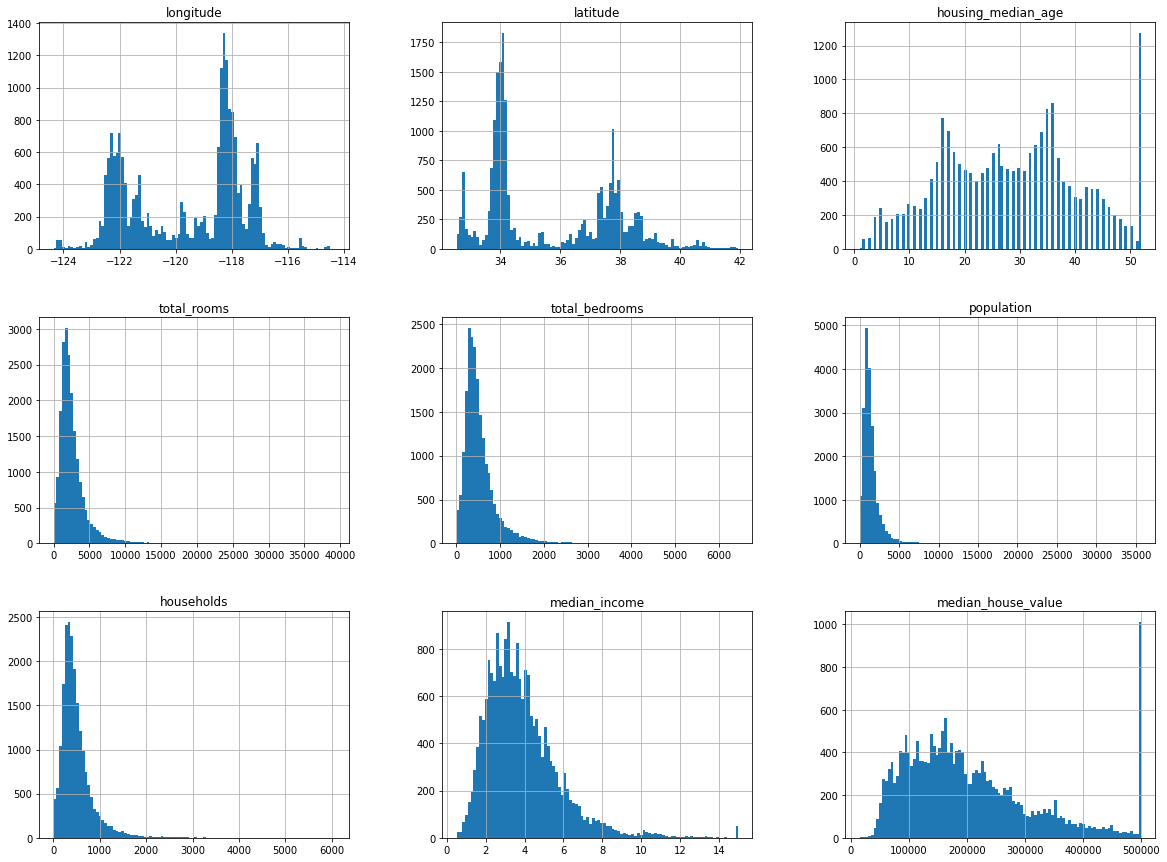

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

housing_data.hist(bins=100, figsize=(20, 15))
plt.show()


In [41]:
import numpy as np

def split_train_data(data, test_ratio):
    '''
        Random implementation, might have a totally different result if we slightly update the database
    '''
    # we want to always have the same permuation for all runs
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [42]:
train_set, test_set = split_train_data(housing_data, .2)

train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [43]:
test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.00000,4128.00000,4128.000000,4128.000000,3921.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.51936,35.58671,28.764293,2610.796269,535.233104,1421.571705,497.750727,3.830338,205500.309593
std,1.99447,2.13276,12.518304,2209.359101,431.299704,1114.023136,387.770570,1.881515,114486.964288
min,-124.19000,32.54000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000
25%,-121.69000,33.93000,18.000000,1420.000000,294.000000,781.000000,278.000000,2.548500,119275.000000
50%,-118.47000,34.23000,29.000000,2110.000000,428.000000,1160.000000,406.000000,3.500000,178650.000000
75%,-117.99000,37.70000,37.000000,3099.250000,643.000000,1722.000000,598.000000,4.645925,263000.000000
max,-114.58000,41.81000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,500001.000000


In [44]:
# We can observe that the data from the two sets are fairly well splitted

# We implement a way to split the data with an hash function, so the data split is deterministic

from zlib import crc32

def test_set_check(identifier, test_ratio):
    '''
        Performs the checksum and returns true if 
        the value is < than 20% * the greatest 32-bit
        integer number.
    '''
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_data_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_train_test = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_train_test], data.loc[in_train_test]


housing_data["id"] = housing_data["longitude"] * 1000 + housing_data["latitude"]  # Should return an unique index

# train_set, test_set = split_data_by_id(housing_data, .2, "index")  # index is from pandas, not the database
train_set, test_set = split_data_by_id(housing_data, .2, "id")

train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
count,16322.000000,16322.000000,16322.000000,16322.000000,16160.000000,16322.000000,16322.000000,16322.000000,16322.000000,16322.000000
mean,-119.658159,35.710956,28.791325,2638.542519,539.099938,1422.068190,499.889903,3.891493,209855.422252,-119622.447971
std,2.022636,2.125724,12.695515,2208.705297,425.786666,1146.063665,385.590566,1.925866,116502.721138,2020.674338
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,-124258.200000
25%,-121.880000,33.970000,18.000000,1446.000000,297.000000,783.000000,280.000000,2.567750,122000.000000,-121843.407500
50%,-118.640000,34.400000,29.000000,2127.000000,435.000000,1161.500000,409.000000,3.544450,182100.000000,-118605.810000
75%,-118.040000,37.730000,37.000000,3138.000000,646.000000,1715.000000,603.000000,4.781300,268975.000000,-118006.220000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,-114435.600000


In [45]:
test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
count,4318.000000,4318.000000,4318.000000,4318.000000,4273.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000
mean,-119.235347,35.332886,28.065540,2625.256832,533.221156,1438.361047,498.215841,3.791964,195517.336498,-119200.014497
std,1.892849,2.148275,12.145234,2076.237472,404.320258,1079.532375,369.784811,1.796005,110390.209921,1890.845334
min,-124.350000,32.550000,2.000000,12.000000,3.000000,5.000000,3.000000,0.499900,14999.000000,-124309.460000
25%,-121.207500,33.840000,18.000000,1458.250000,292.000000,801.000000,279.000000,2.545175,112500.000000,-121169.637500
50%,-118.320000,34.100000,28.000000,2120.500000,433.000000,1183.500000,410.000000,3.505700,171900.000000,-118285.990000
75%,-117.960000,37.400000,36.000000,3170.750000,651.000000,1761.750000,608.750000,4.629050,246200.000000,-117926.002500
max,-114.310000,41.860000,52.000000,30405.000000,4952.000000,12873.000000,4616.000000,15.000100,500001.000000,-114275.810000


<AxesSubplot:>

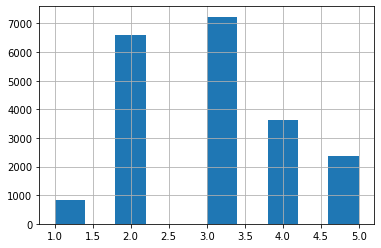

In [46]:
# split the data groups into 5 income categories

housing_data["income_cat"] = pd.cut(housing_data["median_income"], 
                               bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], 
                               labels=[1, 2, 3, 4, 5])

housing_data["income_cat"].hist()



In [47]:
# We use StratifiedShuffleSplit class to split our data into the 5 income categories

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# We assure that the data is correctly splitted for EACH median income category
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
        strat_train_set = housing_data.loc[train_index]
        strat_test_set = housing_data.loc[test_index]
        
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    


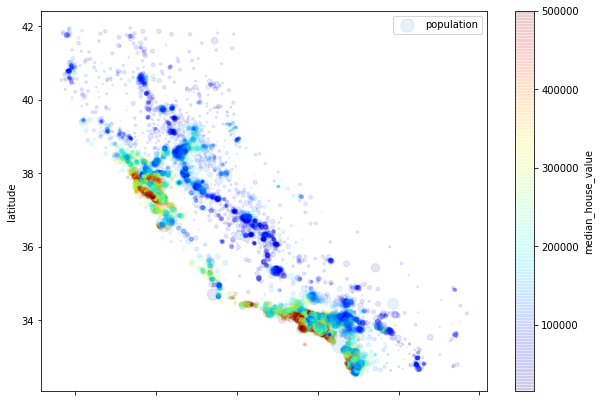

In [48]:
# Creating an exploration test to explore the data more deeply
housing_copy = housing_data.copy()
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
                  s=housing_copy["population"]/100, label="population", figsize=(10, 7),
                  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [49]:
# Linear correlation ratio, good for some cases but only finds linear relations
# (some relations are corellated but not linearly)
corr_matrix = housing_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
id                   -0.046166
latitude             -0.144160
Name: median_house_value, dtype: float64

[]

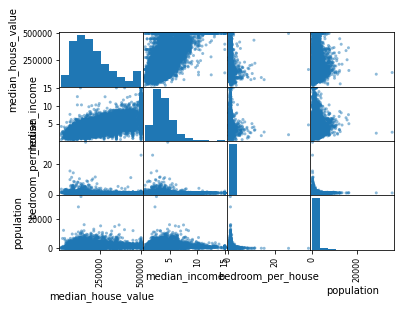

In [50]:
from pandas.plotting import scatter_matrix

housing_copy["bedroom_per_house"] = housing_copy["total_bedrooms"] / housing_copy["households"]

attributes = ["median_house_value", "median_income", "bedroom_per_house", "population"]
scatter_matrix(housing_copy[attributes])
plt.plot()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

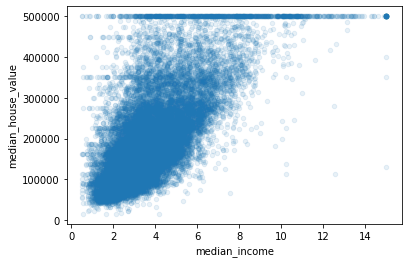

In [51]:
housing_copy.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.1)


<AxesSubplot:xlabel='median_house_value', ylabel='population_per_household'>

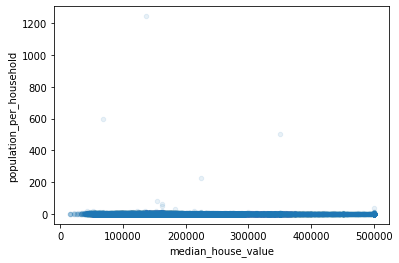

In [52]:
housing_copy["rooms_per_household"] = housing_copy["total_rooms"] / housing_copy["households"]
housing_copy["bedrooms_per_room"] = housing_copy["total_bedrooms"] / housing_copy["total_rooms"]
housing_copy["population_per_household"] = housing_copy["population"] / housing_copy["households"]

housing_copy.plot(kind="scatter", y="population_per_household", x="median_house_value", alpha=.1)


In [53]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [54]:
from sklearn.impute import SimpleImputer

# Fills the non available data with the median value, sort of a machine learning model
imputer = SimpleImputer(strategy="median")
# As the SimpleImputer only works with numerical data
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)


In [55]:
# convert ocean proximity to numbers
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# the problem is that now that the values are encoded in numbers, some models will consider closer certain
# categories than others. It has some sense in some cases but not in our ocean_proximity case. We are going
# to create a new column for each category, and set the row values to 0 or 1

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_hot = cat_encoder.fit_transform(housing_cat)


In [56]:
housing_cat_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4,  5, 6

# Example of utilitary class to improve the data (can be used as a model in a model pipeline)
# Follows the Sklearn API
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
            return self  # nothing to do, passes to the next pipeline element
        
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_data.to_numpy())

In [58]:
# Feature scaling, there are two main ways

# The first, quite simple is to normalize with min/max the data between 0 and 1
# This is good for some alorithms that require the data formatted between 0 and 1
# but is very sensitive to outliers that directly affect the max() value.

# Sklearn provides the MinMaxScaler class for it


# The second is called Standardization, it first substracts the mean value, 
# then divides by the standard deviation so the distribution has unit variance

# Sklearn provides the StandardScaler for it

# We are going to build a pipeline of operations for our data with the sklearn API

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),  # Must be transformer (fit_transform must be defined)
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)),  # Must be transformer
    ('std_scaler', StandardScaler())  # Doesn't have to be a transformer
])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [60]:
# We use this transformer to take care of the categorical data
from sklearn.compose import ColumnTransformer

# Numerical attributes
num_attribs = list(housing_num)  # Returns the list of attributes (not the full data)
cat_attribs = ["ocean_proximity"]

# We add the pipeline into this transformer. Some columns will be taken care by the num_pipeline
# Some others by the OneHotEncoder()
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),  # Instead of putting a transformer, we can also put 'drop' or 'passthrough'
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [61]:
# We now prepare the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(housing_prepared, housing_labels)

some_data = housing.iloc[: 5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions = model.predict(some_data_prepared)

print('Predictions: {}'.format(predictions))
print('Labels: {}'.format(list(some_labels)))


Predictions: [209772. 318784. 212011.  58879. 189704.]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [62]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print(lin_mse, lin_rmse)  # Not very good :(

4709352153.0255575 68624.7196936028


In [63]:
from sklearn.tree import DecisionTreeRegressor  # power model that tries to find non linear relationships

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

print('Tree mse {}, tree rmse {}'.format(tree_mse, tree_rmse))  # Big overfit! Ooof


Tree mse 0.0, tree rmse 0.0


In [64]:
# We have overfit as we predict the same values that we used for training
# We can use cross-validation by two ways

# 1. Split the data in two sets and try the second test to the first
# 2. K-folds, split the data in E.G 10 sets, train on 9/test on 1 and alter between the sets

from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

# Cross val score is more of an utility function than a cost function
# so it returns the inverse of the mse in that case
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print('Tree scores')
display_scores(tree_rmse_scores)

Tree scores
Scores:  [70312.36416015 66621.5721398  69723.66685424 69341.80655856
 72407.07439509 74704.05464023 69790.34870971 68071.65379357
 76285.41228332 69445.57863832]
Mean:  70670.35321730006
Standard deviation:  2811.1490711851293


In [65]:
scores = cross_val_score(model, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

print('Linear regression scores: ')
display_scores(lin_rmse_scores)

Linear regression scores: 
Scores:  [66796.97472434 66977.34659558 70343.22712832 74724.47107018
 68034.58208668 71192.08509419 64958.04469624 68274.76535185
 71540.65993    67668.14438713]
Mean:  69051.03010645059
Standard deviation:  2726.199985822191


In [66]:
# We try with random forest regressor, it uses many decision tree and averages their predictions
# Building a model on top of many models is called ensemble learning

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

print('Random Forest Regressor: ')
display_scores(forest_rmse_scores)


Random Forest Regressor: 
Scores:  [49529.06675393 47625.47752549 49864.92006798 52151.26688147
 49370.4620739  53088.2176586  48908.38127072 47925.70394
 52764.52387126 50083.8535981 ]
Mean:  50131.18736414368
Standard deviation:  1827.883891417145


In [67]:
# We now need to fine tune our model, this works by changing the hyperparameter values
# and find the best set of values. To automate that, we can use the GridSearchCV class

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

# We use 5 folds
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
# print the best estimator

best_model = grid_search.best_estimator_
print(best_model)

RandomForestRegressor(max_features=8, n_estimators=30)


In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


62649.79361343489 {'max_features': 2, 'n_estimators': 3}
53420.70087474609 {'max_features': 2, 'n_estimators': 10}
50902.312266786335 {'max_features': 2, 'n_estimators': 30}
58149.88967889892 {'max_features': 4, 'n_estimators': 3}
50939.831509329546 {'max_features': 4, 'n_estimators': 10}
48817.5187805292 {'max_features': 4, 'n_estimators': 30}
57207.037961800306 {'max_features': 6, 'n_estimators': 3}
50966.941353108974 {'max_features': 6, 'n_estimators': 10}
48687.282903876185 {'max_features': 6, 'n_estimators': 30}
58162.26408527041 {'max_features': 8, 'n_estimators': 3}
50848.700626574675 {'max_features': 8, 'n_estimators': 10}
48650.51027271931 {'max_features': 8, 'n_estimators': 30}
60610.945619532 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
51680.891399781154 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
57531.70879678666 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50531.23857646237 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [70]:
# Another good way to find the best hyperparameters is by using a random search (RandomizedSearch CV)
# That way, you can define how much computational budget you want to allocate to that search

In [71]:
# Get insight of your data by analyzing the best model

features_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedroom_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(features_importances, attributes), reverse=True)


[(0.3600408960242084, 'median_income'),
 (0.15216121973339014, 'INLAND'),
 (0.11115457337518561, 'pop_per_hhold'),
 (0.06375151322048858, 'bedroom_per_room'),
 (0.05764900533403361, 'latitude'),
 (0.051930165419019826, 'id'),
 (0.05191710834301881, 'rooms_per_hhold'),
 (0.041175772445915956, 'housing_median_age'),
 (0.04040453367079411, 'longitude'),
 (0.014674360808058567, 'total_bedrooms'),
 (0.014033829391582785, 'population'),
 (0.013767828923753066, 'total_rooms'),
 (0.013092813574536616, 'households'),
 (0.008630346011488828, '<1H OCEAN'),
 (0.0030282183115519965, 'NEAR OCEAN'),
 (0.0025022108466365663, 'NEAR BAY'),
 (8.560456633652499e-05, 'ISLAND')]

In [72]:
# With all that information, we know that some of them are useless for the analysis and can be dropped

In [73]:
# Final predictions

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

47021.25907485288


In [74]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(), 
                         scale = stats.sem(squared_errors)))

array([45096.47996503, 48870.28856813])